In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

## Data Loader

In [86]:
data = pd.read_csv("AirQualityUCI.csv")
time_index = pd.to_datetime(data.iloc[:, 0])
time_values = data.iloc[:,1]
time_series = pd.Series(time_values.values.astype(np.float32), index=time_index)
time_series = time_series.asfreq('h')
train_data = time_series.iloc[:-12]
test_data = time_series.iloc[-12:]

In [100]:
data = pd.read_csv("electricity.csv")
time_index = pd.to_datetime(data.iloc[:, 0])
time_values = data.iloc[:,1]
time_series = pd.Series(time_values.values.astype(np.float32), index=time_index)
time_series = time_series.asfreq('h')
train_data = time_series.iloc[:-12]
test_data = time_series.iloc[-12:]

In [105]:
# Check if there are any NaN values
has_nan = time_series.isna().any()

# Count the number of NaN values
nan_count = time_series.isna().sum()

if has_nan:
    print(f"Time series contains {nan_count} NaN values.")
else:
    print("Time series does not contain any NaN values.")


Time series does not contain any NaN values.


In [65]:
data = pd.read_csv("AirQualityUCI.csv")
time_index = data.iloc[:,0]
time_values = data.iloc[:,1]
time_series = pd.Series(time_values.values, index=time_index)
train_data = time_series.iloc[:-12]
test_data = time_series.iloc[-12:]
test_data

time
2005-04-04 03:00:00     974.0
2005-04-04 04:00:00     958.0
2005-04-04 05:00:00     987.0
2005-04-04 06:00:00    1129.0
2005-04-04 07:00:00    1600.0
2005-04-04 08:00:00    1777.0
2005-04-04 09:00:00    1375.0
2005-04-04 10:00:00    1374.0
2005-04-04 11:00:00    1264.0
2005-04-04 12:00:00    1241.0
2005-04-04 13:00:00    1041.0
2005-04-04 14:00:00    1129.0
dtype: float64

In [ ]:
# Create a date index for the training data
start_date = pd.to_datetime('2005-01-01')
freq = '1h'  # Monthly Start frequency
train_index = pd.date_range(start=start_date, periods=len(time_series), freq=freq)
train_ts = pd.Series(time_series, index=train_index)
train_data = train_ts.iloc[:-12]
test_data = train_ts.iloc[-12:]

## Traffic

In [66]:
traffic_data_file = r"C:\Users\Feras\OneDrive - University of Toronto\MIE1630\data_preprocessing\raw_data\traffic.h5"

file = traffic_data_file
f = h5py.File(file, "r")
RawData = np.array(f["raw_data"])

time = np.array(f["time"])
t = []
for i in range(time.shape[0]):
	t.append(time[i].decode()) # It was handled by str.encode() before integrated in the h5 file.
time = np.stack(t, axis=0)
time = pd.to_datetime(time)

In [67]:
def analyze_and_plot_max_node(h5_data_file, target_year):
            
    # Load raw data from the h5 file
    f = h5py.File(h5_data_file, "r")
    raw_data = np.array(f["raw_data"])
    
    print("The shape of raw data:", raw_data.shape)

    time = np.array(f["time"])
    t = []
    for i in range(time.shape[0]):
        t.append(time[i].decode()) # It was handled by str.encode() before integrated in the h5 file.
    time = np.stack(t, axis=0)
    time = pd.to_datetime(time)
    
    print("The time stamps:", time)

    # Reshape the raw data and convert to a DataFrame
    reshaped_array = raw_data.squeeze()  # Remove the singleton dimension
    df = pd.DataFrame(reshaped_array)
    df['time'] = time
    df.set_index("time", inplace=True)

    # Ensure the index is a datetime object
    df.index = pd.to_datetime(df.index)

    # Calculate hourly averages and find the node with the maximum average
    hourly_averages = df.mean(axis=0)
    max_avg_node = hourly_averages.idxmax()
    max_avg_value = hourly_averages.max()

    print(f"The node/column with the highest hourly average is: {max_avg_node}")
    print(f"The highest hourly average value is: {max_avg_value}")

    # Extract the time series for the node with the highest average
    max_avg_timeseries = df.loc[:, max_avg_node]

    # Filter the time series for the target year
    if target_year is not None:
        max_avg_timeseries = max_avg_timeseries[max_avg_timeseries.index.year == target_year]
        label = f"Node with maximum hourly average in Year of {target_year}"
        title = f"Time Series for Node {max_avg_node} in {target_year}"
    
    else:
        label = f"Node with maximum hourly average"
        title = f"Time Series for Node {max_avg_node}"
        
    # Plot the time series for the selected year
    plt.figure(figsize=(10, 6), dpi=300)  # Set the figure size
    plt.plot(
        max_avg_timeseries.index, 
        max_avg_timeseries, 
        label=label, 
        alpha=0.6, 
        linewidth=0.7
    )

    # Add labels, title, and legend
    plt.title(title, fontsize=14)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Values", fontsize=12)
    plt.legend(loc='upper right', fontsize=6)  # Adjust legend
    plt.grid(True)
    plt.tight_layout()

    # Show the plot
    plt.show()
    
    # export to csv
    dataset_name = h5_data_file.split("\\")[-1].split(".")[-2]
    max_avg_timeseries.to_csv(f"{dataset_name}.csv")

The shape of raw data: (17544, 862, 1)
The time stamps: DatetimeIndex(['2016-07-01 02:00:00', '2016-07-01 03:00:00',
               '2016-07-01 04:00:00', '2016-07-01 05:00:00',
               '2016-07-01 06:00:00', '2016-07-01 07:00:00',
               '2016-07-01 08:00:00', '2016-07-01 09:00:00',
               '2016-07-01 10:00:00', '2016-07-01 11:00:00',
               ...
               '2018-07-01 16:00:00', '2018-07-01 17:00:00',
               '2018-07-01 18:00:00', '2018-07-01 19:00:00',
               '2018-07-01 20:00:00', '2018-07-01 21:00:00',
               '2018-07-01 22:00:00', '2018-07-01 23:00:00',
               '2018-07-02 00:00:00', '2018-07-02 01:00:00'],
              dtype='datetime64[ns]', length=17544, freq=None)
The node/column with the highest hourly average is: 406
The highest hourly average value is: 0.169072457820337


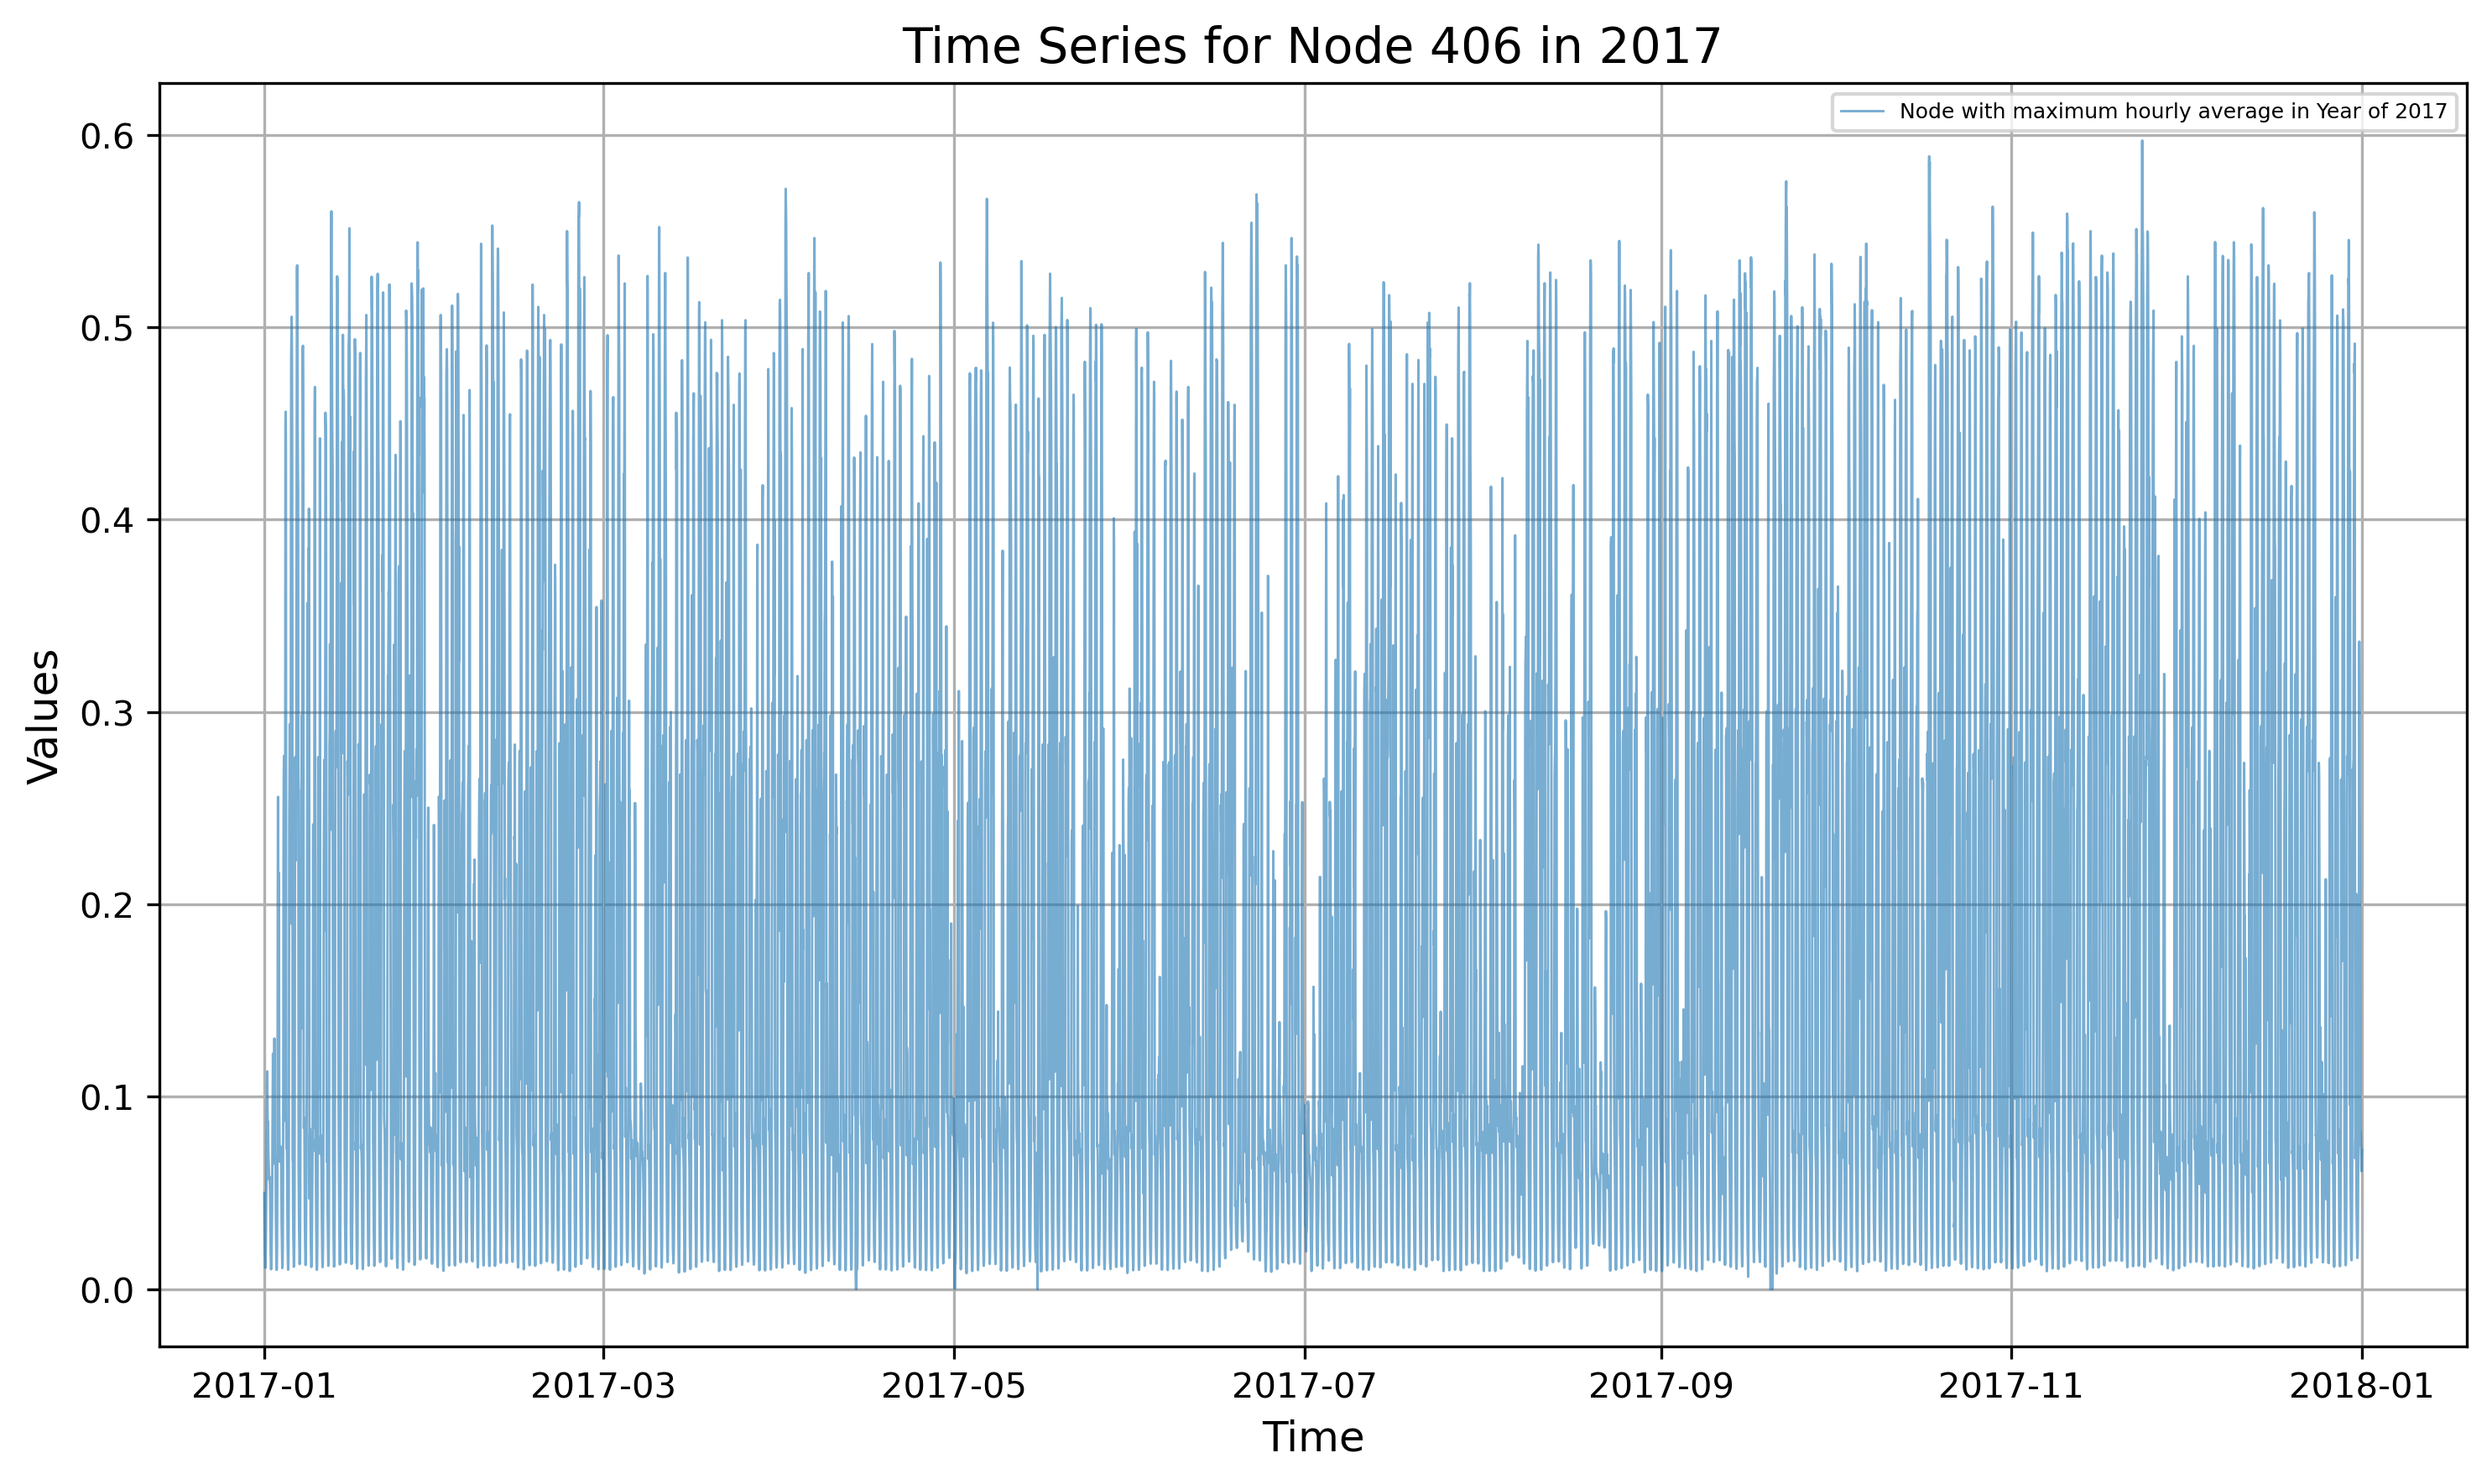

In [68]:
# Example usage (replace RawData and time with your actual data):
analyze_and_plot_max_node(traffic_data_file, target_year=2017)

## Electricity

The shape of raw data: (26304, 321, 1)
The time stamps: DatetimeIndex(['2016-07-01 02:00:00', '2016-07-01 03:00:00',
               '2016-07-01 04:00:00', '2016-07-01 05:00:00',
               '2016-07-01 06:00:00', '2016-07-01 07:00:00',
               '2016-07-01 08:00:00', '2016-07-01 09:00:00',
               '2016-07-01 10:00:00', '2016-07-01 11:00:00',
               ...
               '2019-07-01 16:00:00', '2019-07-01 17:00:00',
               '2019-07-01 18:00:00', '2019-07-01 19:00:00',
               '2019-07-01 20:00:00', '2019-07-01 21:00:00',
               '2019-07-01 22:00:00', '2019-07-01 23:00:00',
               '2019-07-02 00:00:00', '2019-07-02 01:00:00'],
              dtype='datetime64[ns]', length=26304, freq=None)
The node/column with the highest hourly average is: 313
The highest hourly average value is: 200529.12484793187


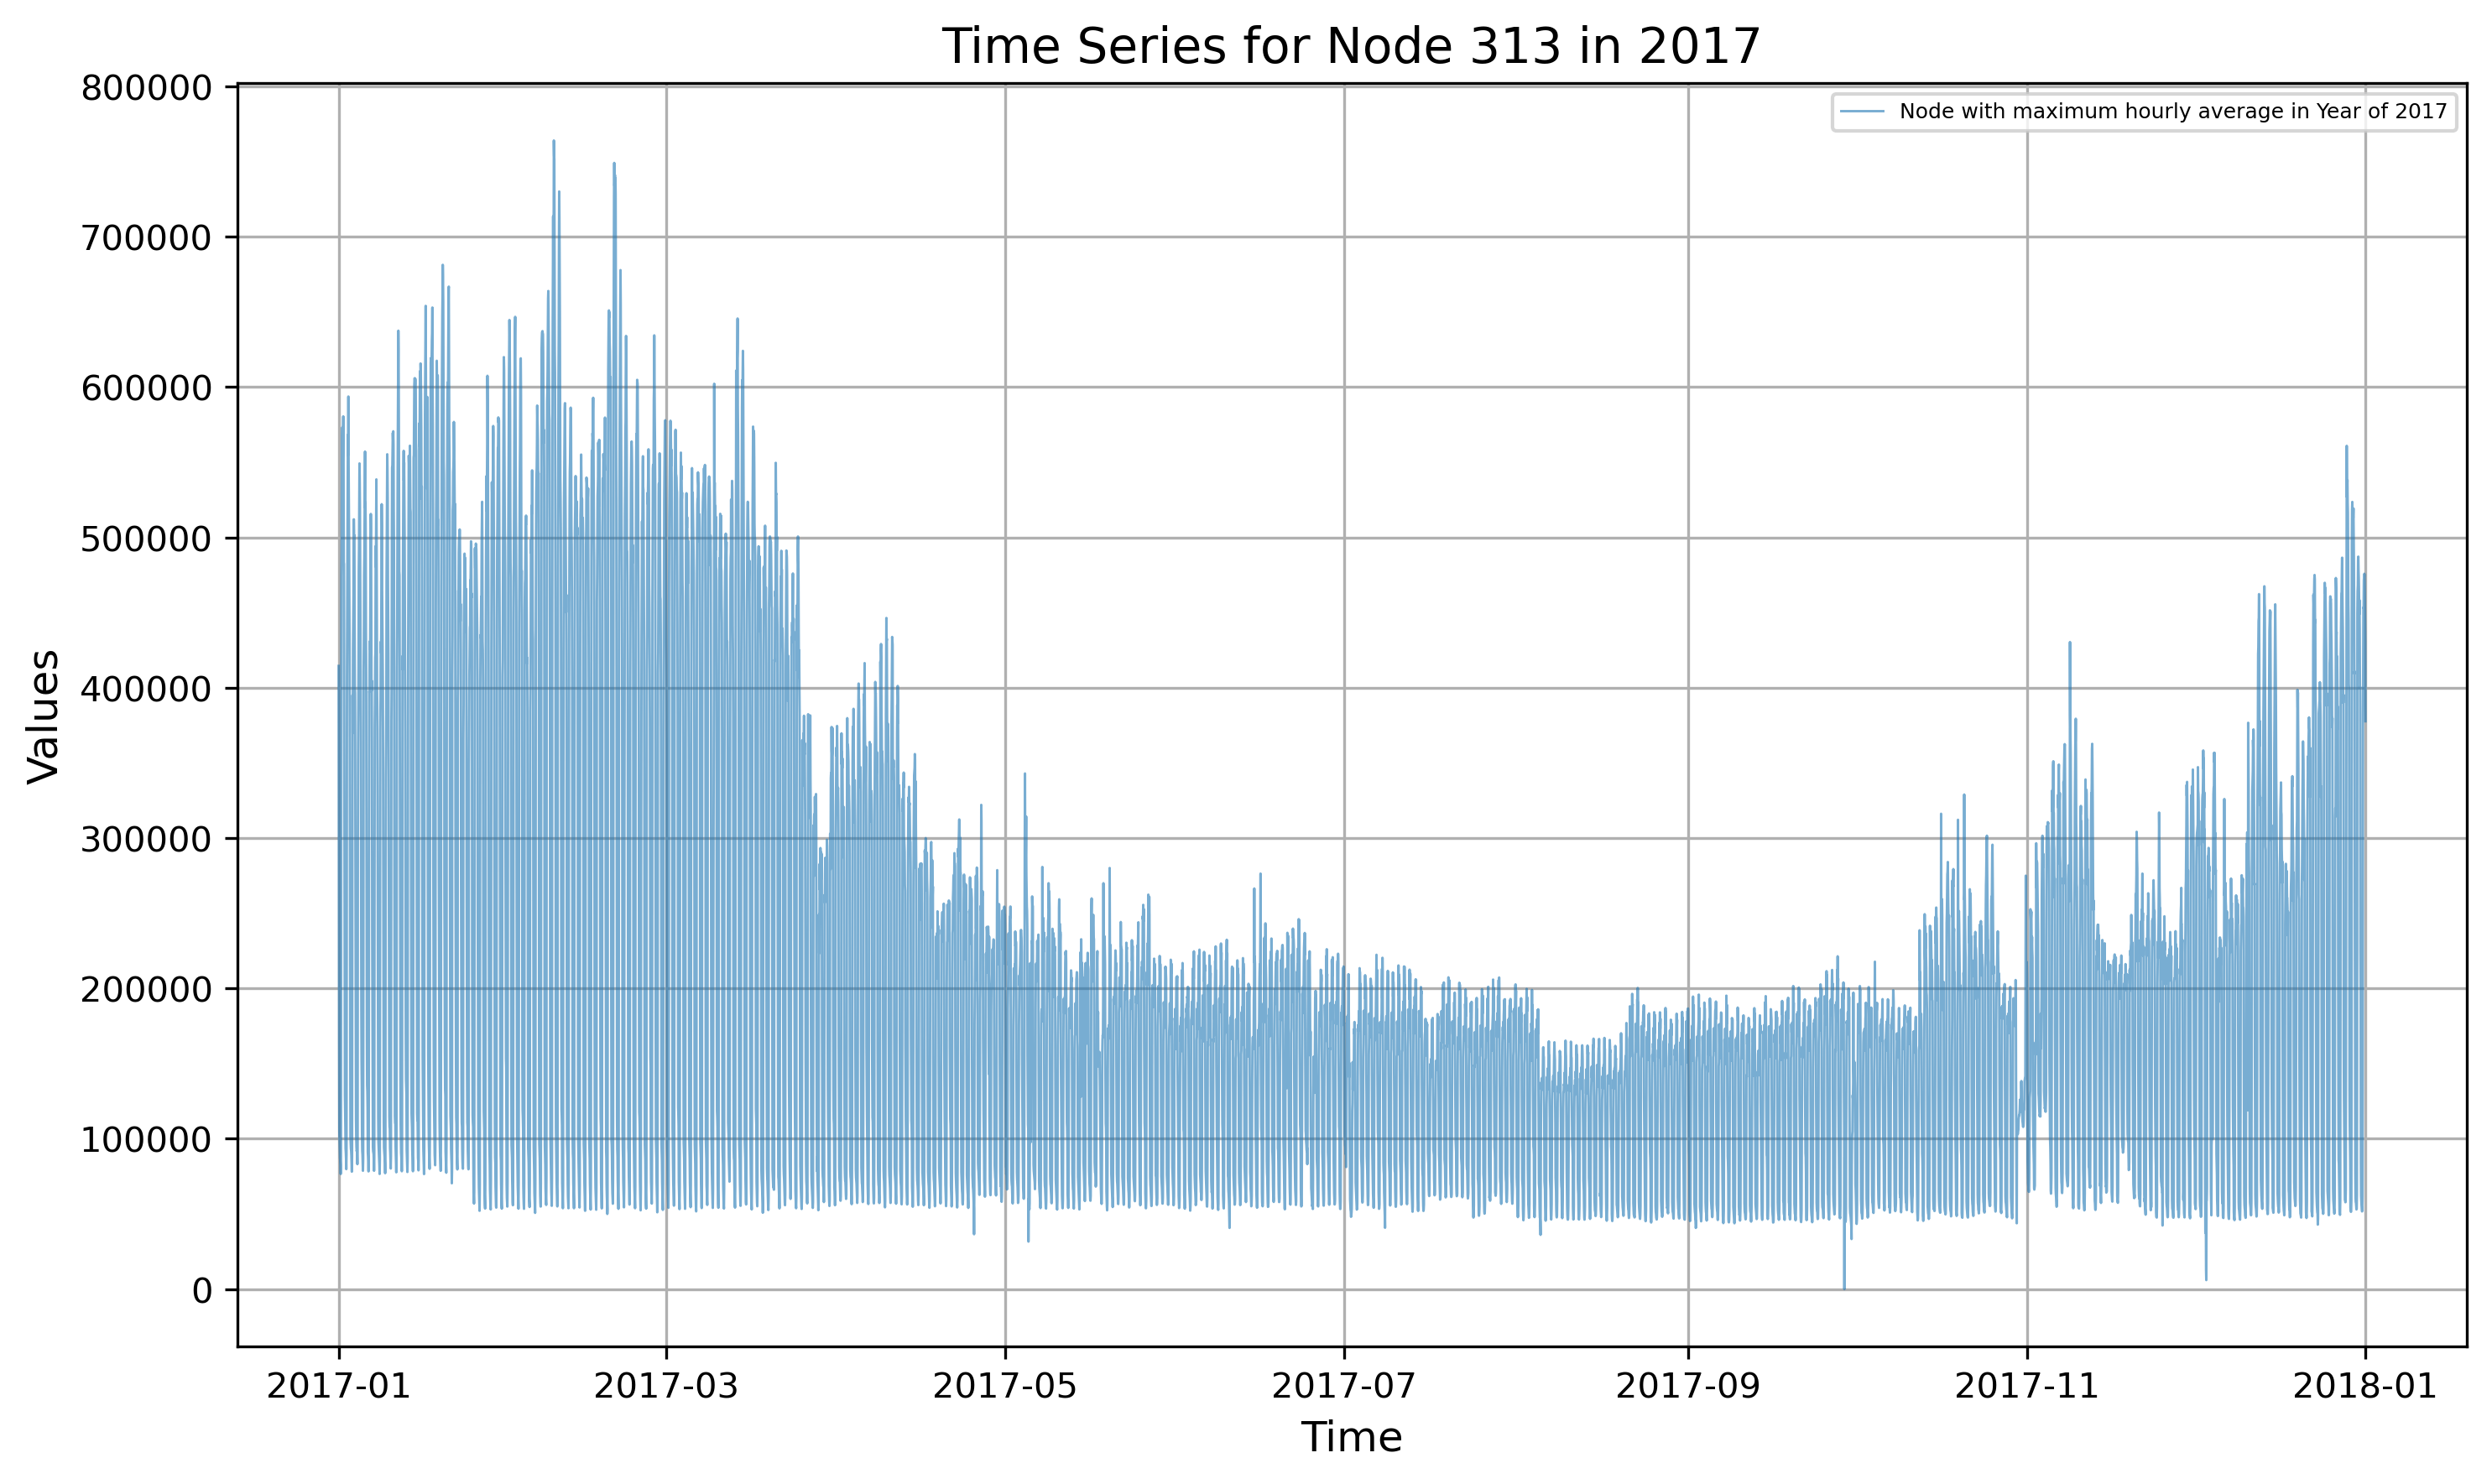

In [69]:
electricity_data_file = r"C:\Users\Feras\OneDrive - University of Toronto\MIE1630\data_preprocessing\raw_data\electricity.h5"
analyze_and_plot_max_node(electricity_data_file, target_year=2017)

## Air Quality

The shape of raw data: (9357, 13, 1)
The time stamps: DatetimeIndex(['2004-03-10 18:00:00', '2004-03-10 19:00:00',
               '2004-03-10 20:00:00', '2004-03-10 21:00:00',
               '2004-03-10 22:00:00', '2004-03-10 23:00:00',
               '2004-03-11 00:00:00', '2004-03-11 01:00:00',
               '2004-03-11 02:00:00', '2004-03-11 03:00:00',
               ...
               '2005-04-04 05:00:00', '2005-04-04 06:00:00',
               '2005-04-04 07:00:00', '2005-04-04 08:00:00',
               '2005-04-04 09:00:00', '2005-04-04 10:00:00',
               '2005-04-04 11:00:00', '2005-04-04 12:00:00',
               '2005-04-04 13:00:00', '2005-04-04 14:00:00'],
              dtype='datetime64[ns]', length=9357, freq=None)
The node/column with the highest hourly average is: 8
The highest hourly average value is: 1453.0145345730468


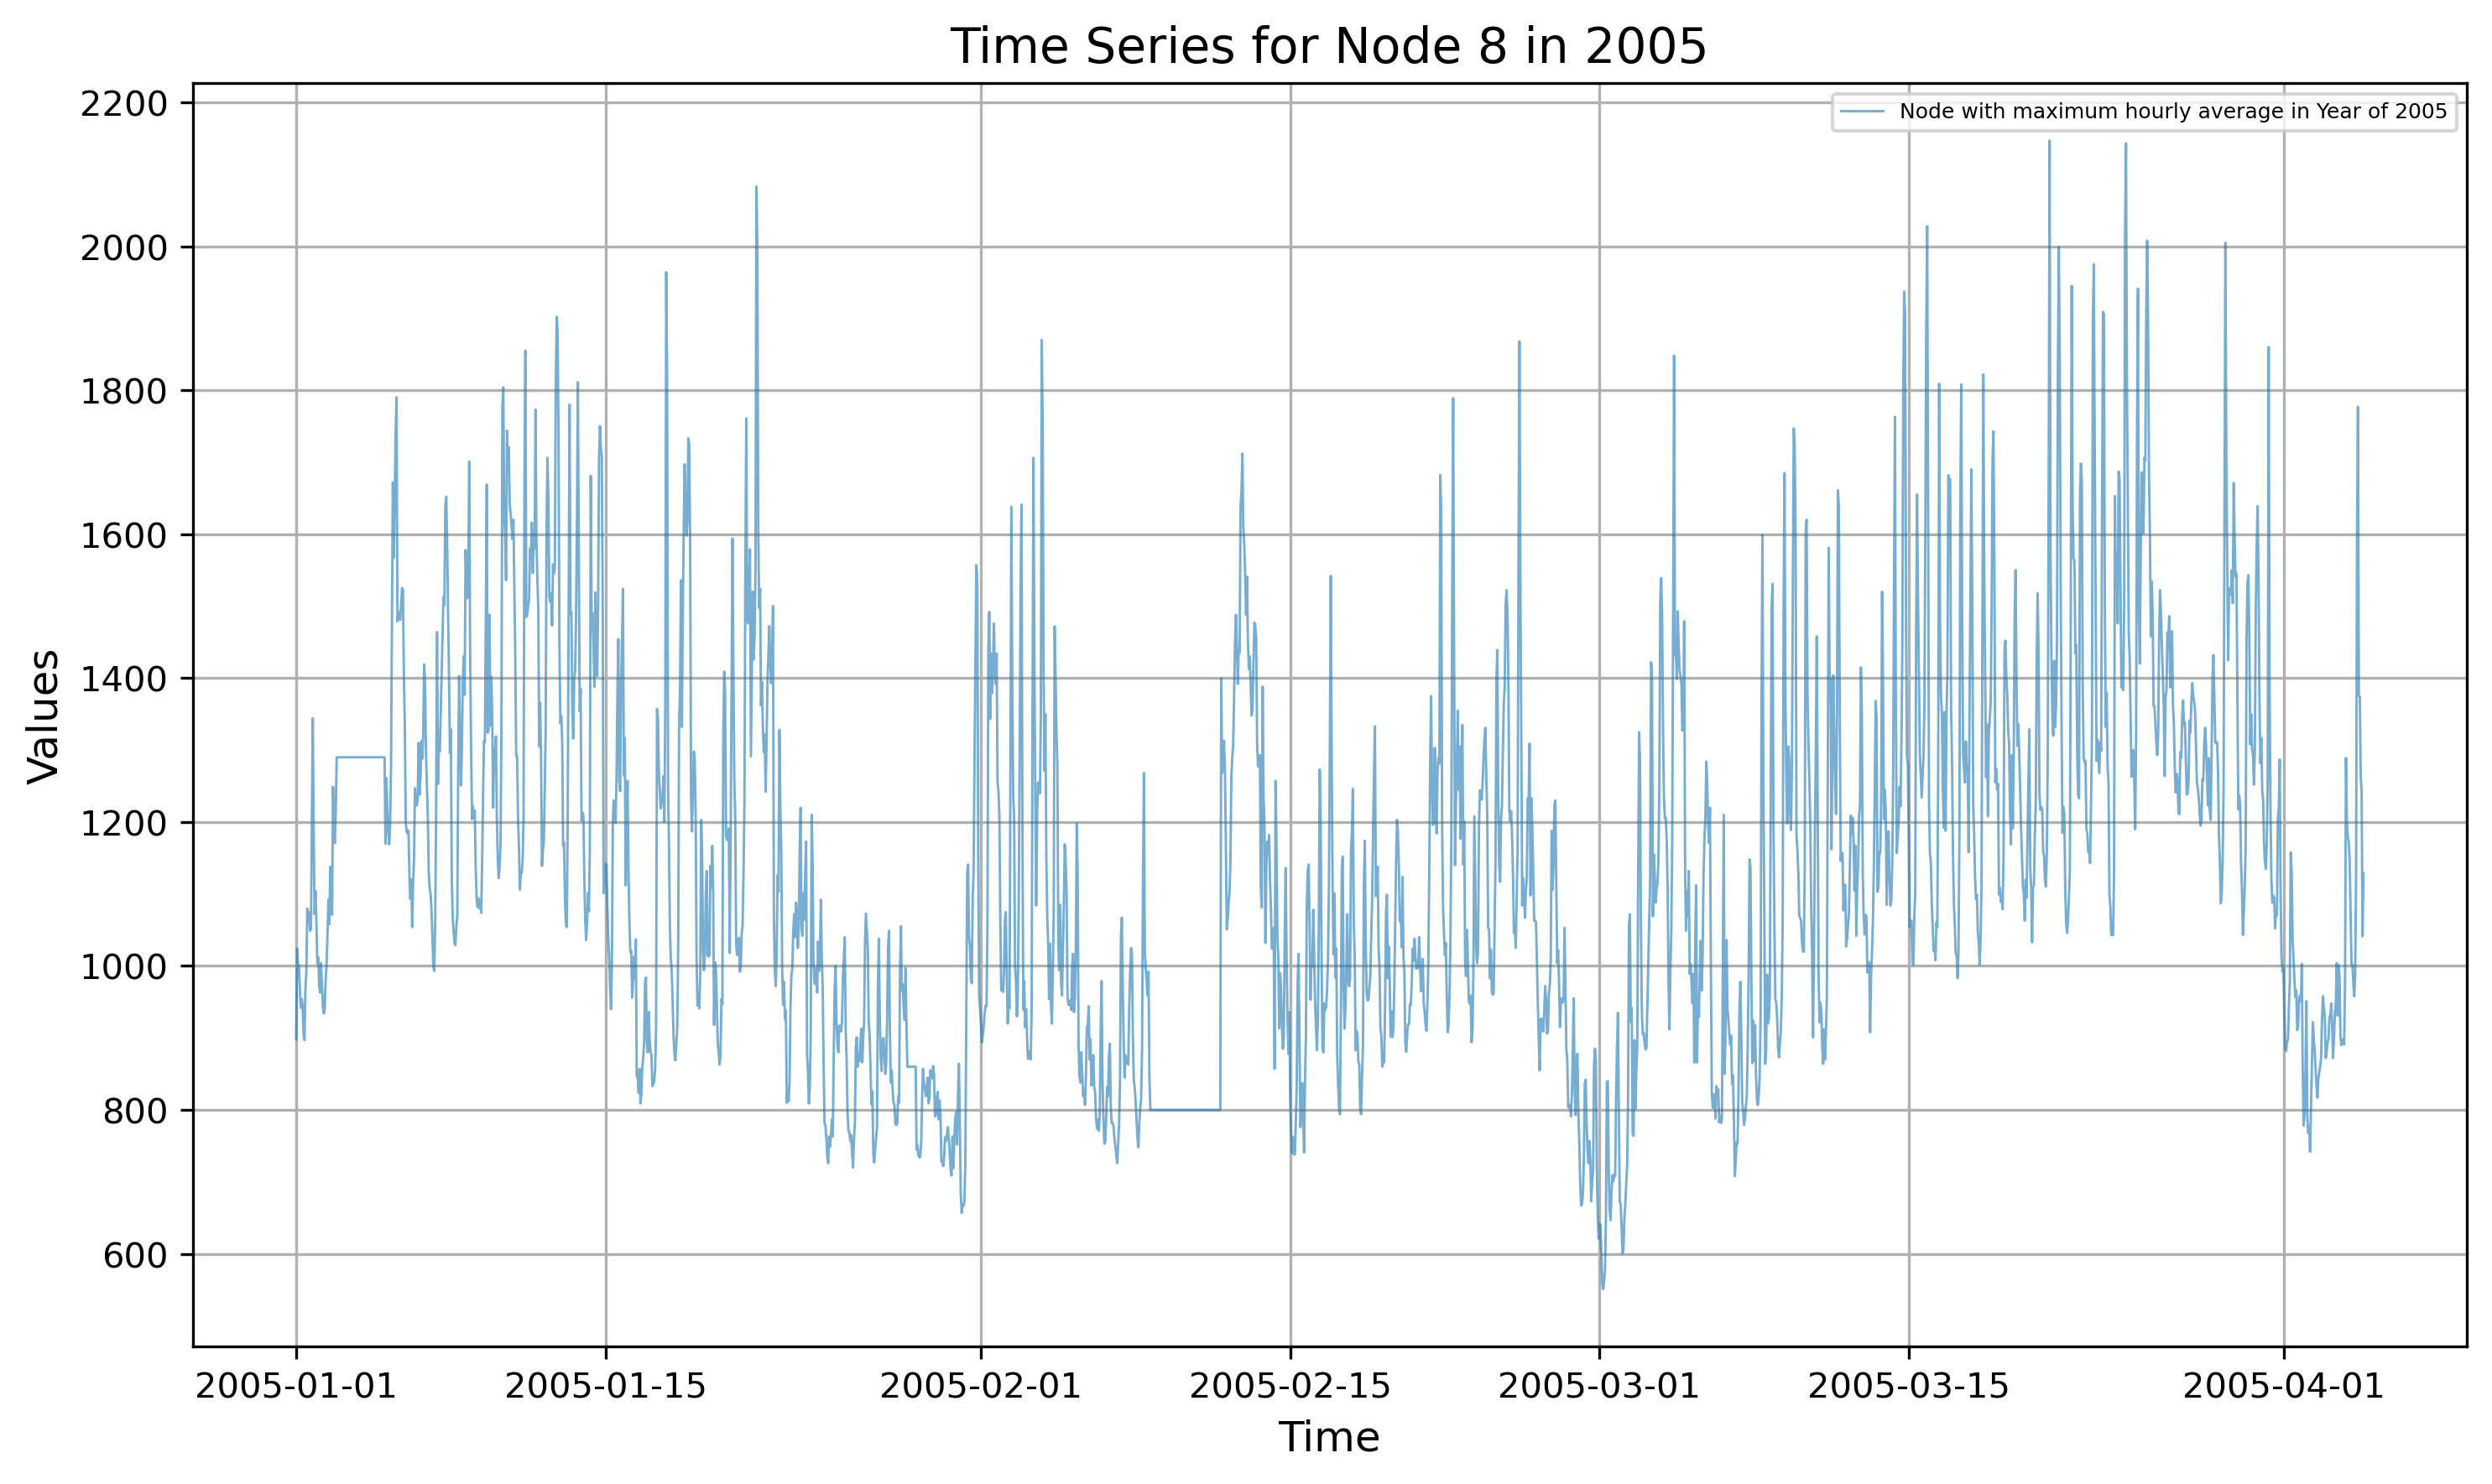

In [71]:
AirQualityUCI_data_file = r"C:\Users\Feras\OneDrive - University of Toronto\MIE1630\data_preprocessing\raw_data\AirQualityUCI.h5"
analyze_and_plot_max_node(AirQualityUCI_data_file, target_year=2005)